#### 전체 파일 로드 및 데이터 전처리, 생성

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns

# 데이터 파일 읽기
sad = pd.read_csv("../data/sad.csv", encoding="euc-kr")
stress = pd.read_csv("../data/stress.csv", encoding="euc-kr", header=None)
migration = pd.read_csv("../data/migration.csv", encoding="euc-kr")
blood = pd.read_csv("../data/pressure.csv")
smoke = pd.read_csv("../data/smoke.csv",  encoding="euc-kr")
crimal = pd.read_csv("../data/crimal.csv", encoding="euc-kr")

# 데이터 프레임 정보 확인
# print(sad.head())
# print(stress.head())
# print(migration.head())
# print(blood.head())
# print(smoke.head())
# print(crimal.head())

# NaN 값 존재 여부 확인
# print(sad.isna().sum())        
# print(stress.isna().sum())
# print(migration.isna().sum())
# print(blood.isna().sum()) 
# print(smoke.isna().sum()) 
# print(crimal.isna().sum()) 


# 데이터프레임 크기 확인
# print(sad.shape)     
# print(stress.shape)
# print(migration.shape)
# print(blood.shape)
# print(smoke.shape)
# print(crimal.shape)

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

# 시군구별로 인덱스 설정 및 원래 열 제거
sad.set_index('시군구별(1)', inplace=True)
migration.set_index('행정구역(시군구)별', inplace=True)
blood.set_index('시군구별(1)', inplace=True)
smoke.set_index('시군구별(1)', inplace=True)
crimal.set_index('시군구별(1)', inplace=True)

# 첫 번째 열을 인덱스로 설정
stress.set_index(stress.columns[0], inplace=True)

#### 전국의 지난 10년동안 관찰된 우울 지수 히트맵

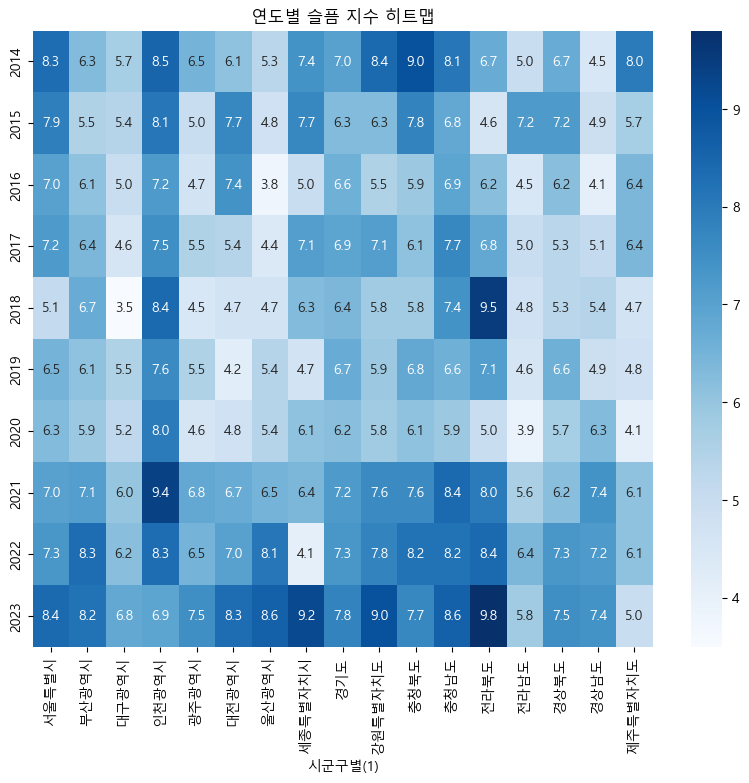

In [29]:
import seaborn as sns

# 히트맵을 그리기 위해 데이터를 전치
plt.figure(figsize=(10, 8))
sns.heatmap(sad.T, annot= True, cmap='Blues', fmt=".1f")
# coolwarm, bwr, seismic, Spectral, RdBu
# sns.heatmap(sad, annot=True, cmap='coolwarm', fmt=".1f")#.T 전치 

# 그래프 제목 설정
plt.title('연도별 슬픔 지수 히트맵')
plt.show()

In [30]:
# 각 지역별 우울 지수의 평균 계산
sad_mean_by_region = sad.mean(axis=1)

# 우울 지수가 높은 순서대로 정렬
sad_mean_sorted = sad_mean_by_region.sort_values(ascending=False)

# 결과 출력
print("지역별 스트레스 지수 평균 (높은 순):")
print(sad_mean_sorted)

지역별 스트레스 지수 평균 (높은 순):
시군구별(1)
인천광역시      7.99
충청남도       7.46
전라북도       7.21
서울특별시      7.10
충청북도       7.10
강원특별자치도    6.92
경기도        6.84
부산광역시      6.66
세종특별자치시    6.40
경상북도       6.40
대전광역시      6.23
제주특별자치도    5.73
경상남도       5.72
광주광역시      5.71
울산광역시      5.70
대구광역시      5.39
전라남도       5.28
dtype: float64


#### 전국의 지난 10년동안 관찰된 스트레스 지수 히트맵

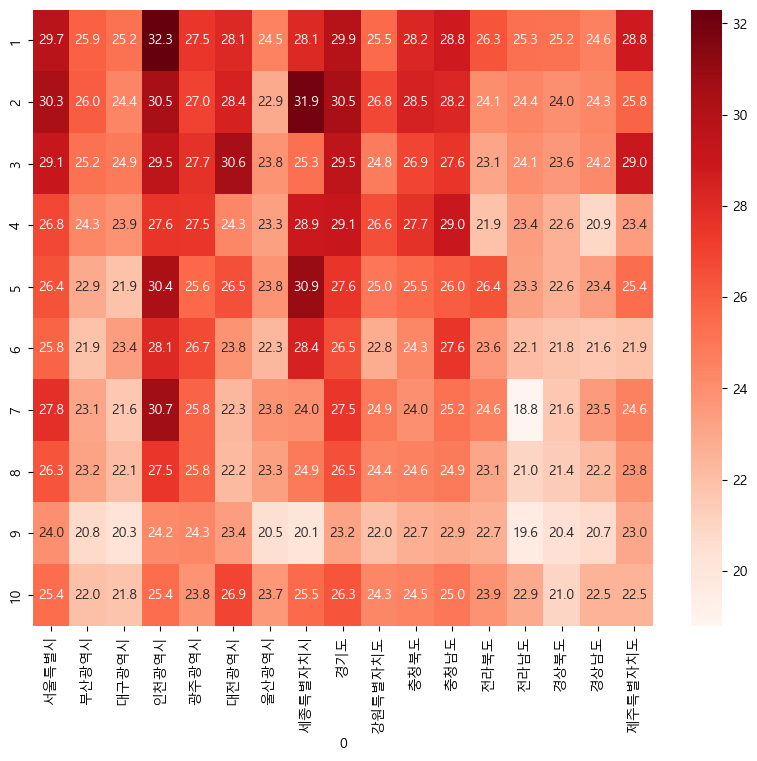

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))
sns.heatmap(stress.T, annot=True, cmap='Reds', fmt=".1f")

#'Malgun Gothic' (윈도우 한글 폰트)
plt.rcParams['axes.unicode_minus'] = False

In [32]:
# 각 지역별 스트레스 지수의 평균 계산
stress_mean_by_region = stress.mean(axis=1)

# 스트레스 지수가 높은 순서대로 정렬
stress_mean_sorted = stress_mean_by_region.sort_values(ascending=False)

# 결과 출력
print("지역별 스트레스 지수 평균 (높은 순):")
print(stress_mean_sorted)

지역별 스트레스 지수 평균 (높은 순):
0
인천광역시      28.62
경기도        27.66
서울특별시      27.16
세종특별자치시    26.80
충청남도       26.52
광주광역시      26.17
충청북도       25.69
대전광역시      25.65
제주특별자치도    24.82
강원특별자치도    24.71
전라북도       23.97
부산광역시      23.53
울산광역시      23.19
대구광역시      22.95
경상남도       22.79
전라남도       22.49
경상북도       22.42
dtype: float64


#### 특정지역의 연도별 범죄율

인천광역시의 연도별 범죄율:
2014    3578.0
2015    3767.0
2016    3723.3
2017    3443.3
2018    3201.9
2019    3425.4
2020    3273.7
2021    2897.6
2022    3072.9
Name: 인천광역시, dtype: float64

인천광역시의 평균 범죄율: 3375.8999999999996


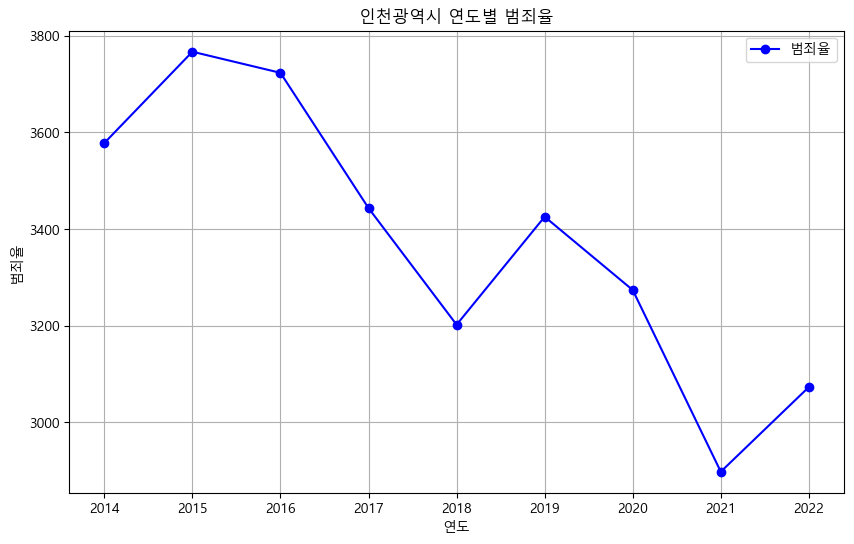

지역별 범죄율 평균 (높은 순):
시군구별(1)
제주특별자치도    4791.055556
부산광역시      3852.955556
광주광역시      3766.177778
경상남도       3729.900000
전라남도       3640.322222
강원특별자치도    3556.655556
대구광역시      3503.588889
충청남도       3499.133333
서울특별시      3483.366667
경기도        3393.955556
충청북도       3388.544444
인천광역시      3375.900000
경상북도       3296.622222
대전광역시      3246.322222
전라북도       3183.166667
울산광역시      2438.455556
세종특별자치시    1872.344444
dtype: float64


In [33]:
import matplotlib.pyplot as plt

# 인천광역시의 연도별 범죄율 데이터 선택
incheon_crime_data = crimal.loc['인천광역시']

# 범죄율 데이터 확인
print("인천광역시의 연도별 범죄율:")
print(incheon_crime_data)

# 범죄율의 평균을 계산
incheon_crime_mean = incheon_crime_data.mean()
print(f"\n인천광역시의 평균 범죄율: {incheon_crime_mean}")

# 범죄율 변화 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(incheon_crime_data.index, incheon_crime_data.values, marker='o', color='blue', label='범죄율')
plt.title('인천광역시 연도별 범죄율')
plt.xlabel('연도')
plt.ylabel('범죄율')
plt.legend()
plt.grid(True)
plt.show()

# 각 지역별로 범죄율 평균 계산
crime_mean_by_region = crimal.mean(axis=1)

# 범죄율이 높은 순서대로 정렬
crime_mean_sorted = crime_mean_by_region.sort_values(ascending=False)

# 결과 출력
print("지역별 범죄율 평균 (높은 순):")
print(crime_mean_sorted)

         2014  2015    2016    2017    2018    2019    2020    2021    2022
시군구별(1)                                                                    
서울특별시    3854  3856  3753.3  3575.7  3494.8  3499.8  3292.4  2890.1  3134.2
부산광역시    4204  4453  4117.1  3750.0  3667.9  3770.7  3764.0  3389.4  3560.5
대구광역시    4150  4330  3771.8  3324.2  3228.9  3400.5  3274.2  3032.6  3020.1
인천광역시    3578  3767  3723.3  3443.3  3201.9  3425.4  3273.7  2897.6  3072.9
광주광역시    4823  4560  4107.8  3731.9  3510.0  3627.1  3439.1  3094.5  3002.2


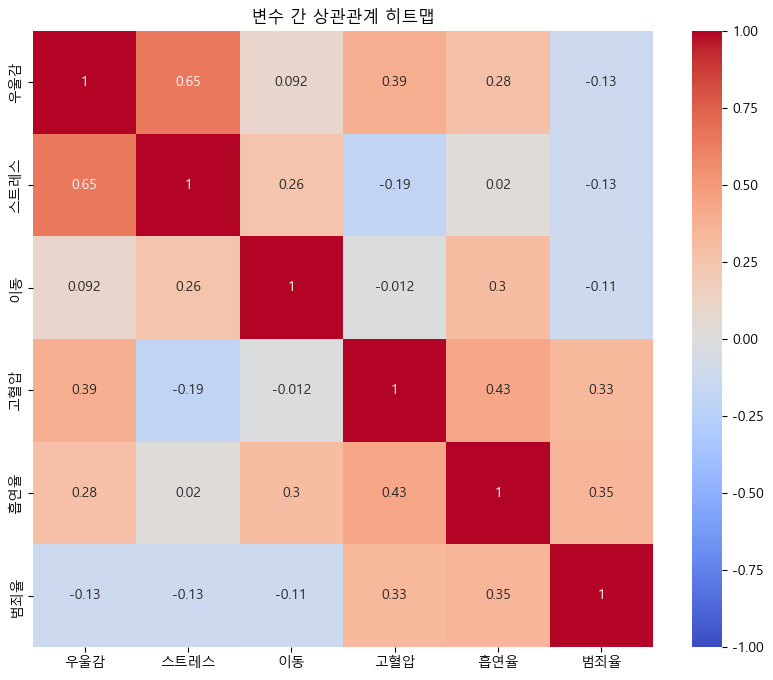

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns


# 상관계수 계산
# 서울 = (7.5 + 8.0 + 7.8 + 8.1 + 7.7 + 8.0 + 7.9 + 8.2 + 7.8 + 8.1) / 10 형식
# mean() 함수를 적용하면 각 시군구별로 여러 연도에 걸친 값의 평균을 계산 axis = 1일때 

correlation_matrix = pd.DataFrame({
    '우울감': sad.mean(axis=1),
    '스트레스': stress.mean(axis=1),
    '이동': migration.mean(axis=1),
    '고혈압': blood.mean(axis=1),
    '흡연율': smoke.mean(axis=1),
    '범죄율': crimal.mean(axis=1)
}).corr()

# 자료 확인 
# print("우울감:", sad)
# print("스트레스:", stress)
# print("이동:", migration)
# print("고혈압:", blood)
# print("흡연율:", smoke)
# print("범죄율:", crimal)

# 자료 길이 확인
# print(len(sad))
# print(len(stress))
# print(len(migration))
# print(len(blood))
# print(len(smoke))
# print(len(crimal))

# 자료 타입 확인 
# print(type(sad))
# print(type(stress))
# print(type(migration))
# print(type(blood))
# print(type(smoke))
# print(type(crimal))

# correlation_matrix = pd.DataFrame({
#     '우울감': sad.loc['서울특별시'],  # 첫 번째 열 선택
#     '스트레스': stress.loc['서울특별시'],
#     '이동': migration.loc['서울특별시'],
#     '고혈압': blood.loc['서울특별시'],
#     '흡연율': smoke.loc['서울특별시'],
#     '범죄율': crimal.loc['서울특별시']
# }).corr()

print(crimal.head())

# 상관계수 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# 그래프 제목 설정
plt.title('변수 간 상관관계 히트맵')

# 그래프 출력
plt.show()

# 0.7 ~ 1.0 또는 -0.7 ~ -1.0: 강한 상관관계
# 0.4 ~ 0.7 또는 -0.4 ~ -0.7: 중간 정도의 상관관계
# 0.1 ~ 0.4 또는 -0.1 ~ -0.4: 약한 상관관계
# 0 ~ 0.1 또는 0 ~ -0.1: 거의 무시할 수 있는 상관관계

# 우울감과 스트레스: 우울감이 높아질수록 스트레스도 높아질 가능성이 높다
# 고혈압과 흡연율: 흡연율이 높을수록 고혈압이 발생할 가능성이 있다
# 범죄율과 고혈압, 흡연율: 범죄율이 증가할수록 고혈압과 흡연율도 증가할 수 있다
# 스트레스와 고혈압: 스트레스가 높을수록 고혈압이 약간 낮아지는 경향이 있다

#### 종속 변수들 간의 상관관계 분석

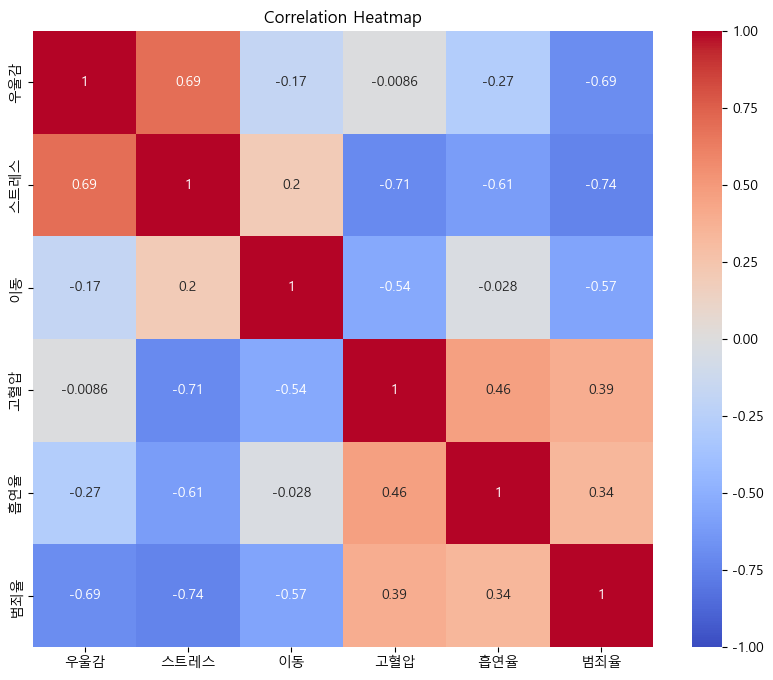

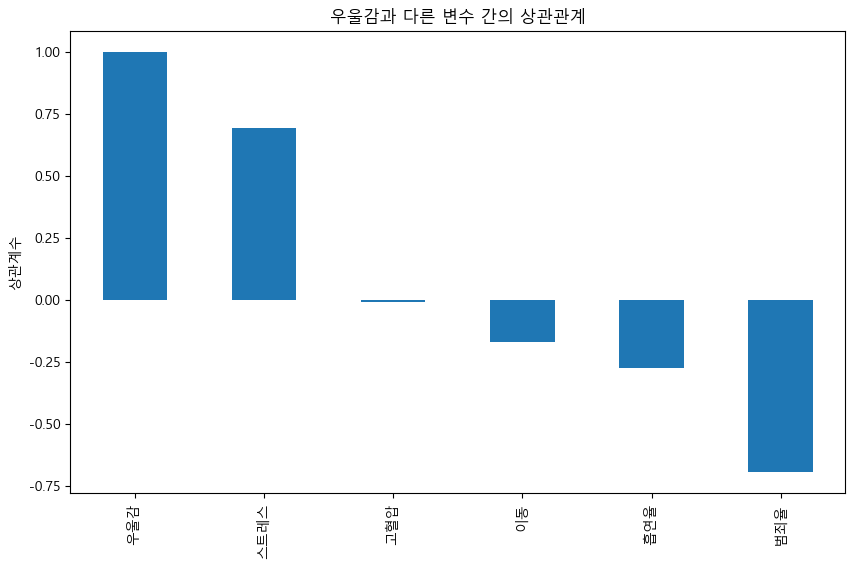

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# 전체 평균 상관
# correlation_matrix = pd.DataFrame({
#     '우울감': sad.mean(),
#     '스트레스': stress.mean(),
#     '이동': migration.mean(),
#     '고혈압': blood.mean(),
#     '흡연율': smoke.mean(),
#     '범죄율': crimal.mean()
# }).corr()

# 변수 간의 상관계수 계산 (Cluster 제외)
correlations = correlation_matrix.corr()

# 상관계수 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 특정 변수와의 상관관계 시각화 (예: 우울감과 다른 변수 간의 상관관계)
correlations['우울감'].sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('우울감과 다른 변수 간의 상관관계')
plt.ylabel('상관계수')
plt.show()

#### 특정 지역의 연도별 이동율 그래프

인천광역시의 연도별 이동률:
2014     9324
2015     9538
2016     5777
2017    -1670
2018      -67
2019    -2337
2020   -15748
2021    11423
2022    28101
2023    33507
Name: 인천광역시, dtype: int64

인천광역시의 평균 이동율: 7784.8


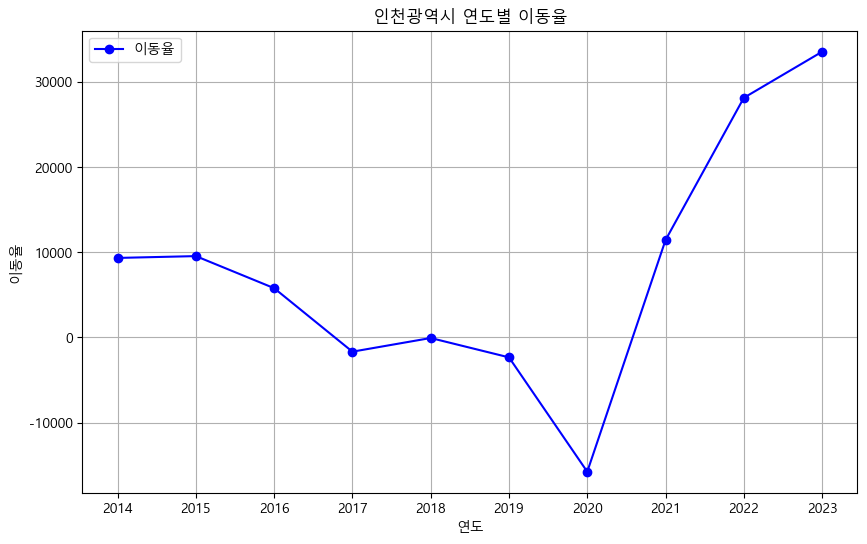

행정구역(시군구)별
경기도        111408.7
세종특별자치시     24509.1
충청남도        10350.8
인천광역시        7784.8
제주특별자치도      7455.1
충청북도         3478.2
강원특별자치도      2682.7
전라남도        -3611.6
경상북도        -5360.5
경상남도        -6339.7
광주광역시       -6698.1
전북특별자치도     -6740.6
울산광역시       -8266.8
대전광역시      -11285.3
대구광역시      -14553.8
부산광역시      -18679.9
서울특별시      -86133.1
dtype: float64


In [44]:
import matplotlib.pyplot as plt

# 인천광역시의 연도별 이동율 데이터 선택
incheon_migration_data = migration.loc['인천광역시']

# 이동율 데이터 확인
print("인천광역시의 연도별 이동률:")
print(incheon_migration_data)

# 범죄율의 평균을 계산
incheon_mean = incheon_migration_data.mean()
print(f"\n인천광역시의 평균 이동율: {incheon_mean}")

# 이동율 변화 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(incheon_migration_data.index, incheon_migration_data.values, marker='o', color='blue', label='이동율')
plt.title('인천광역시 연도별 이동율')
plt.xlabel('연도')
plt.ylabel('이동율')
plt.legend()
plt.grid(True)
plt.show()

# 각 지역별로 이동율 평균 계산
migration_mean_by_region = migration.mean(axis=1)

# 이동율이 높은 순서대로 정렬
migration_mean_sorted = migration_mean_by_region.sort_values(ascending=False)
print(migration_mean_sorted)

#### 특정 지역의 연도별 슬픔 지수 확인 

인천광역시의 연도별 슬픔:
2014    8.5
2015    8.1
2016    7.2
2017    7.5
2018    8.4
2019    7.6
2020    8.0
2021    9.4
2022    8.3
2023    6.9
Name: 인천광역시, dtype: float64

인천광역시의 평균 이동율: 7.99


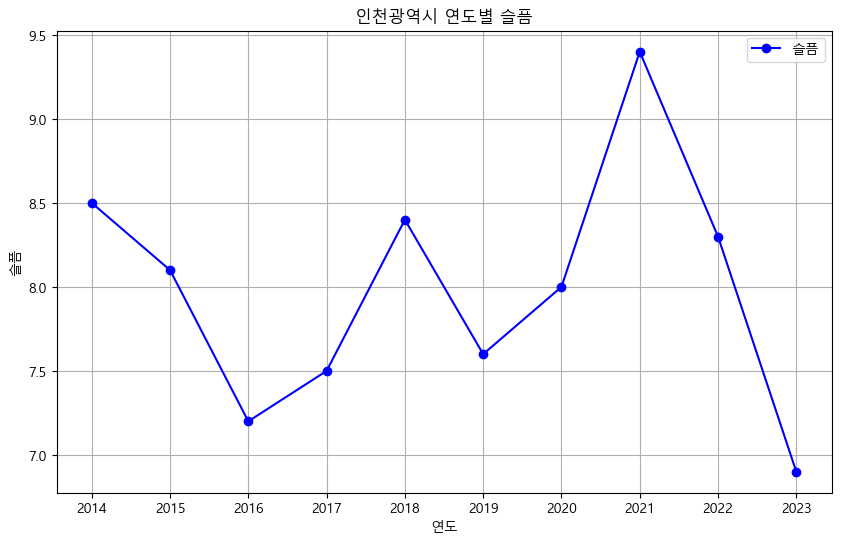

시군구별(1)
인천광역시      7.99
충청남도       7.46
전라북도       7.21
서울특별시      7.10
충청북도       7.10
강원특별자치도    6.92
경기도        6.84
부산광역시      6.66
세종특별자치시    6.40
경상북도       6.40
대전광역시      6.23
제주특별자치도    5.73
경상남도       5.72
광주광역시      5.71
울산광역시      5.70
대구광역시      5.39
전라남도       5.28
dtype: float64


In [45]:
import matplotlib.pyplot as plt

# 인천광역시의 연도별 슬픔 데이터 선택
incheon_sad_data = sad.loc['인천광역시']

# 이동율 데이터 확인
print("인천광역시의 연도별 슬픔:")
print(incheon_sad_data)

# 범죄율의 평균을 계산
incheon_mean = incheon_sad_data.mean()
print(f"\n인천광역시의 평균 이동율: {incheon_mean}")

# 이동율 변화 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(incheon_sad_data.index, incheon_sad_data.values, marker='o', color='blue', label='슬픔')
plt.title('인천광역시 연도별 슬픔')
plt.xlabel('연도')
plt.ylabel('슬픔')
plt.legend()
plt.grid(True)
plt.show()

# 각 지역별로 슬픔 평균 계산
sad_mean_by_region = sad.mean(axis=1)

# 이동율이 높은 순서대로 정렬
sad_mean_sorted = sad_mean_by_region.sort_values(ascending=False)
print(sad_mean_sorted)

#### 연도별 스트레스 추이 변화

Text(0.5, 1.0, '연도별 스트레이 추이 변화')

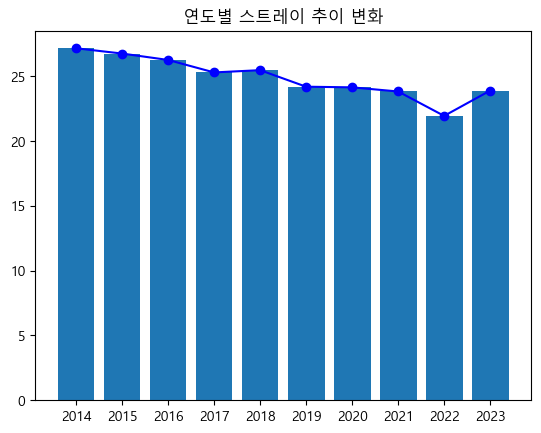

In [65]:
import matplotlib.pyplot as plt
import pandas as pd

stress = pd.read_csv("../data/stress.csv", encoding="euc-kr")
# 열 이름 변경
#print(len(stress))
#print(stress.columns)
stress.columns = ['도시', '2014', '2015', '2016', '2017','2018', '2019','2020', '2021','2022','2023']
stress = stress.drop('도시', axis=1)
# 인덱스 이름 변경
y = stress.mean()
x = list(stress.columns)
# plt.plot(y)
plt.rc('font', family='Malgun Gothic')
plt.bar(x, y)
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title("연도별 스트레이 추이 변화")

#### 소득수준 전체 데이터 프레임 생성 및 시각화

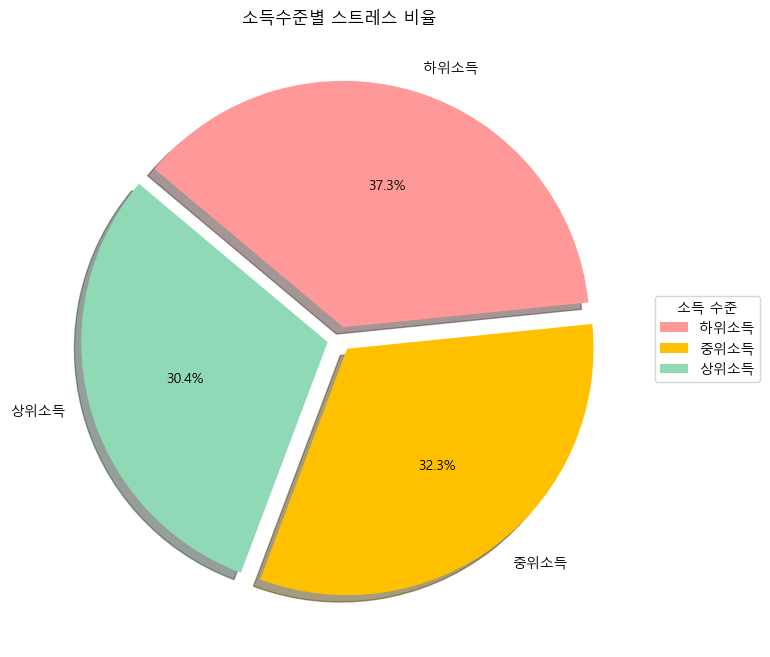

In [53]:
import pandas as pd

# 파일을 열고 데이터를 줄 단위로 읽어오기
with open("../data/stress_income.csv", 'r', encoding='utf-8') as file:
    lines = [line.strip().split(',') for line in file]

# 열의 개수가 맞지 않는 행 제거
valid_lines = [line for line in lines if len(line) == 11]

# 데이터프레임 생성 (컬럼을 지정하지 않음)
stress_income = pd.DataFrame(valid_lines[0:])

# 결과 확인
# 행 0~5까지의 데이터
stress_total = stress_income.iloc[0:5]
stress_total.set_index(0, inplace=True)
stress_total = stress_total.apply(pd.to_numeric)
middle_mean = stress_total.loc[['중하', '중', '중상']].mean().mean()
# stress_total_means = {
#     '하': stress_total.loc['하'].mean(),
#     '중하': stress_total.loc['중하'].mean(),
#     '중': stress_total.loc['중'].mean(),
#     '중상': stress_total.loc['중상'].mean(),
#     '상': stress_total.loc['상'].mean(),
# }
stress_total_means = {
    '하위소득': stress_total.loc['하'].mean(),
    '중위소득': middle_mean,
    '상위소득': stress_total.loc['상'].mean(),
}
# 원형 차트 그리기
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#8fd9b6']
plt.figure(figsize=(8, 8))
plt.pie(stress_total_means.values(), labels=stress_total_means.keys(), autopct='%1.1f%%', startangle=140,
         counterclock=False, explode=explode, shadow=True, colors=colors)
plt.legend(stress_total_means.keys(), title="소득 수준", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('소득수준별 스트레스 비율')
plt.show()




#### 남성의 소득수준별 데이터 전처리 및 그래프 시각화

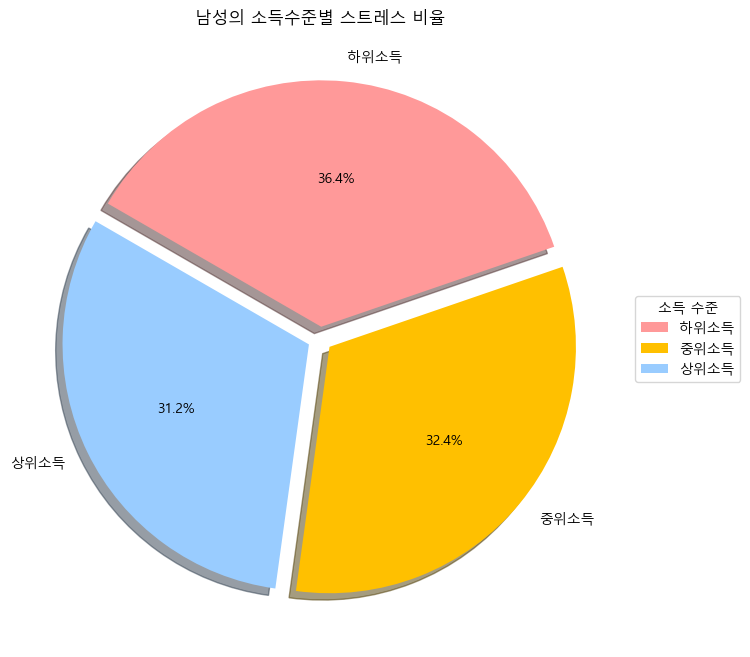

In [64]:
# 행 6~10까지의 데이터
stress_man = stress_income.iloc[5:10]
stress_man.set_index(0, inplace=True)
stress_man = stress_man.apply(pd.to_numeric)
# stress_man_means = {
#     '하': stress_man.loc['하'].mean(),
#     '중하': stress_man.loc['중하'].mean(),
#     '중': stress_man.loc['중'].mean(),
#     '중상': stress_man.loc['중상'].mean(),
#     '상': stress_man.loc['상'].mean(),
# }
man_middle_mean = stress_man.loc[['중하', '중', '중상']].mean().mean()

stress_man_means = {
    '하위소득': stress_man.loc['하'].mean(),
    '중위소득': man_middle_mean,
    '상위소득': stress_man.loc['상'].mean(),
}

# 원형 차트 그리기
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000',  '#99ccff']
plt.figure(figsize=(8, 8))
plt.pie(stress_man_means.values(), labels=stress_man_means.keys(), autopct='%1.1f%%', startangle=150,
         counterclock=False, explode=explode, shadow=True, colors=colors)
plt.legend(stress_man_means.keys(), title="소득 수준", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.title('남성의 소득수준별 스트레스 비율')
plt.show()


#### 여성의 소득수준별 데이터 전처리 및 그래프 시각화

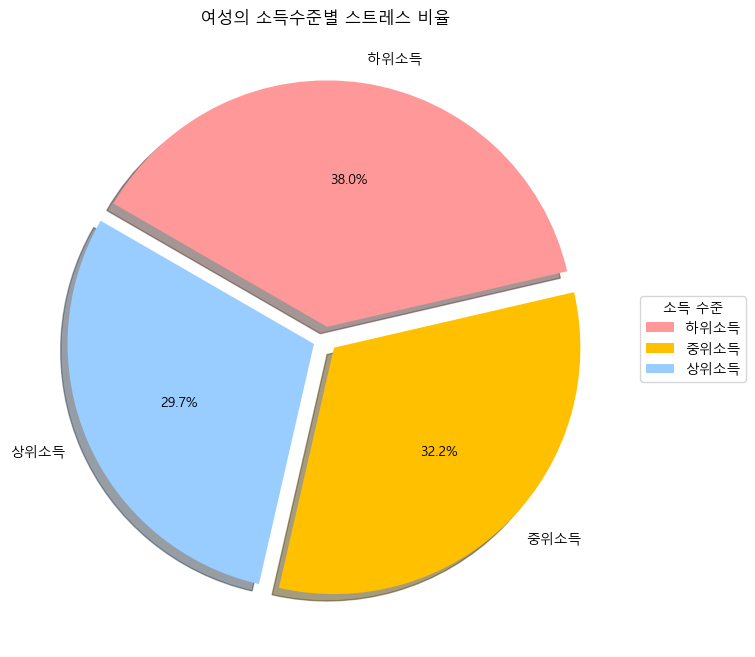

In [55]:
# 행 10~14까지의 데이터
stress_woman = stress_income.iloc[10:]
stress_woman.set_index(0, inplace=True)
# print(stress_man)
stress_woman = stress_woman.apply(pd.to_numeric)

man_middle_mean = stress_man.loc[['중하', '중', '중상']].mean().mean()

stress_man_means = {
    '하위소득': stress_man.loc['하'].mean(),
    '중위소득': man_middle_mean,
    '상위소득': stress_man.loc['상'].mean(),
}

woman_middle_mean = stress_woman.loc[['중하', '중', '중상']].mean().mean()

# stress_woman_means = {
#     '하': stress_woman.loc['하'].mean(),
#     '중하': stress_woman.loc['중하'].mean(),
#     '중': stress_woman.loc['중'].mean(),
#     '중상': stress_woman.loc['중상'].mean(),
#     '상': stress_woman.loc['상'].mean(),
# }
stress_woman_means = {
    '하위소득': stress_woman.loc['하'].mean(),
    '중위소득': woman_middle_mean,
    '상위소득': stress_woman.loc['상'].mean(),
}

# colors = [
#     '#ff9999',  # 연한 빨강
#     '#ffc000',  # 연한 주황
#     '#8fd9b6',  # 연한 민트
#     '#d395d0',  # 연한 보라
#     '#ffcc99',  # 연한 살구
#     '#99ccff',  # 연한 파랑
#     '#ff9966',  # 연한 주황빛 빨강
#     '#c2c2f0',  # 연한 라벤더
#     '#ffb3e6',  # 연한 핑크
#     '#c4e17f'   # 연한 연두
# ]

# 원형 차트 그리기
explode = [0.05, 0.05, 0.05]
colors = ['#ff9999', '#ffc000', '#99ccff']

plt.figure(figsize=(8, 8))
plt.pie(stress_woman_means.values(), labels=stress_woman_means.keys(),
        autopct='%1.1f%%', startangle=150, explode=explode,
         counterclock=False, shadow=True, colors=colors)
plt.legend(stress_woman_means.keys(), title="소득 수준", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('여성의 소득수준별 스트레스 비율')
plt.show()


#### 남여 소득수준별 스트레스 비율 파이차트

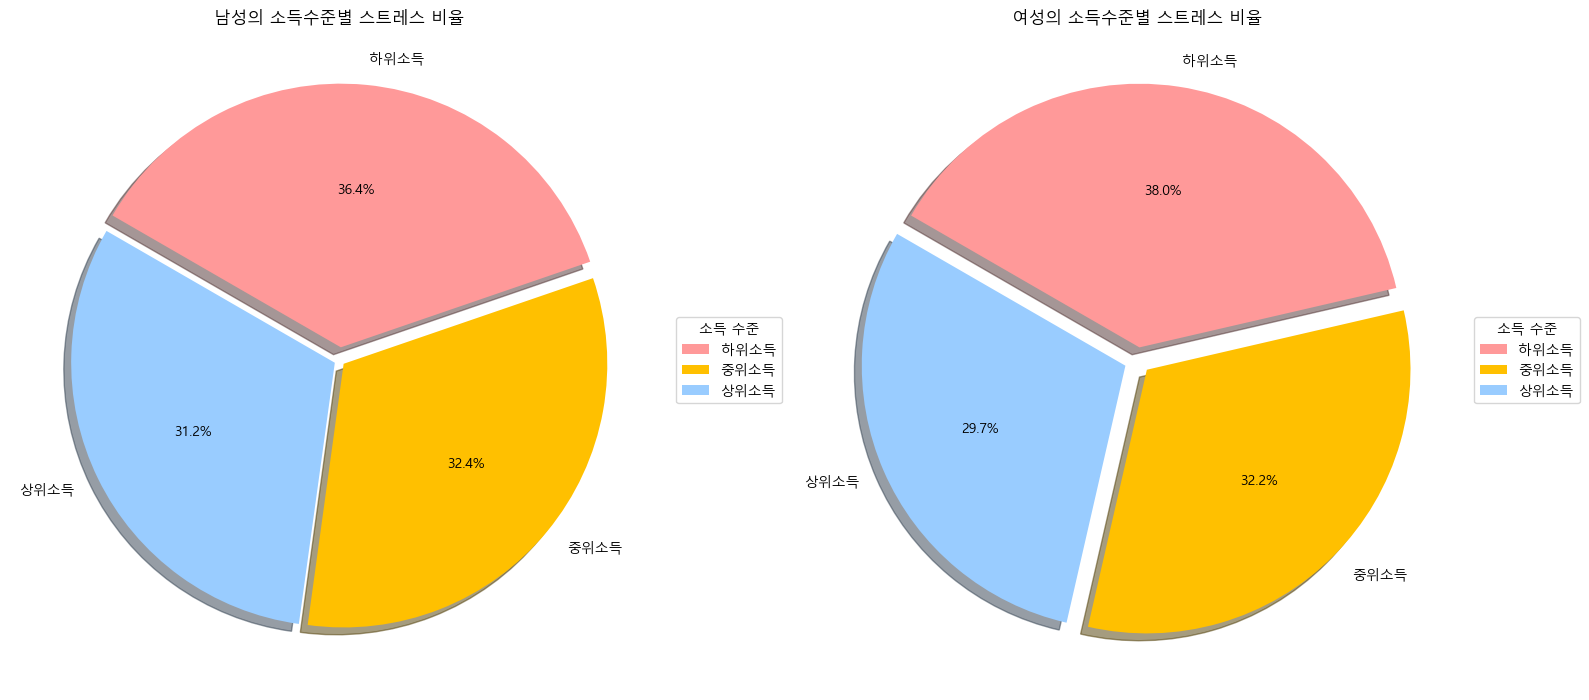

In [56]:
# 서브플롯 설정
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
colors = ['#ff9999', '#ffc000', '#99ccff']
# 첫 번째 파이 차트
axs[0].pie(stress_man_means.values(), labels=stress_man_means.keys(),
           autopct='%1.1f%%', startangle=150, explode=[0.05, 0.02, 0.02],
           counterclock=False, shadow=True, colors=colors)
axs[0].legend(stress_man_means.keys(), title="소득 수준", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axs[0].set_title('남성의 소득수준별 스트레스 비율')

# 두 번째 파이 차트
axs[1].pie(stress_woman_means.values(), labels=stress_woman_means.keys(),
           autopct='%1.1f%%', startangle=150, explode=[0.05, 0.05, 0.05],
           counterclock=False, shadow=True, colors=colors)
axs[1].legend(stress_woman_means.keys(), title="소득 수준", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axs[1].set_title('여성의 소득수준별 스트레스 비율')

# 서브플롯 간 레이아웃 조정
plt.tight_layout()

# 차트 표시
plt.show()


#### WordCloud 생성하기

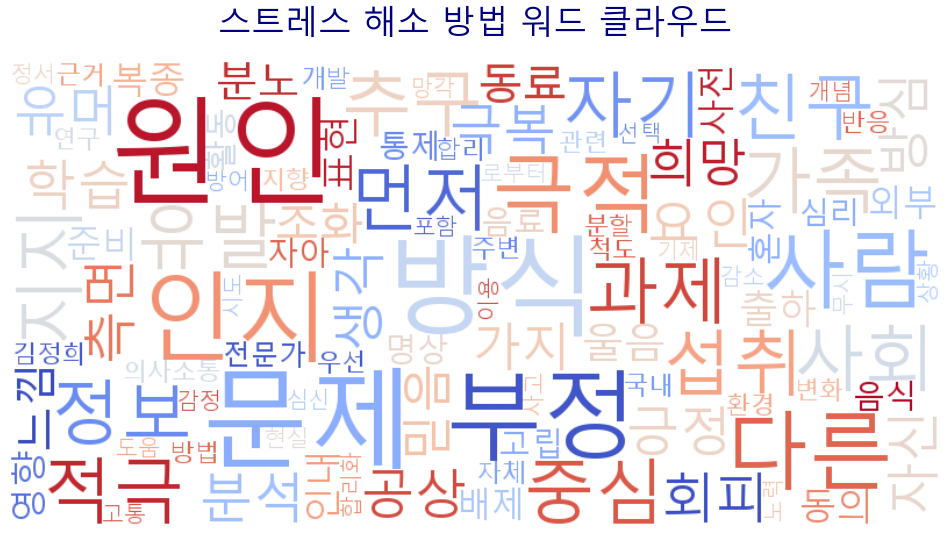

In [63]:
import PyPDF2
from collections import Counter
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# PDF에서 텍스트 추출
def extract_text_from_pdf(pdf_path, start_page=None, end_page=None):
    with open(pdf_path, 'rb') as file:
        reader = PyPDF2.PdfReader(file)
        text = ""
        
        # start_page와 end_page의 값 설정
        if start_page is None:
            start_page = 0  # 시작 페이지가 지정되지 않은 경우 첫 페이지부터 시작
        if end_page is None:
            end_page = len(reader.pages)  # 끝 페이지가 지정되지 않은 경우 마지막 페이지까지
        
        # 지정된 페이지 범위에서 텍스트 추출
        for page_num in range(start_page, end_page):
            text += reader.pages[page_num].extract_text()
    
    return text


# 텍스트 전처리 및 형태소 분석
def analyze_text(text):
    okt = Okt()
    nouns = okt.nouns(text)
    # 한 글자 이상의 단어만 포함하고, "대", "위", "한", "해"를 포함하지 않은 단어만 필터링
    filter_words = ["대", "위", "한", "해", "스"]
    nouns = [noun for noun in nouns if len(noun) > 1 and not any(fw in noun for fw in filter_words)]
    return nouns

# # 워드 클라우드 설정
# wordcloud = WordCloud(
#     font_path='C:/Windows/Fonts/malgun.ttf',  # 한글 폰트 경로
#     width=800,  # 워드 클라우드 이미지의 너비
#     height=400,  # 워드 클라우드 이미지의 높이
#     max_words=100,  # 표시할 최대 단어 수
#     background_color='white',  # 배경 색상
#     colormap='plasma',  # 색상 맵
#     contour_color='black',  # 테두리 색상
#     contour_width=1  # 테두리 두께
# ).generate_from_frequencies(word_freq)

# # 워드 클라우드 시각화
# plt.figure(figsize=(12, 6))  # 그림 크기 설정
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")  # 축 제거
# plt.title("스트레스 해소 방법 워드 클라우드", fontsize=20)  # 제목 추가
# plt.show()

# 이미지 파일로 저장 (선택 사항)
# plt.savefig('wordcloud.png')

# 워드 클라우드 생성 함수
def generate_wordcloud(word_freq):
    wordcloud = WordCloud(
        font_path='C:/Windows/Fonts/malgun.ttf',  # 폰트 경로
        width=800,  # 이미지의 너비
        height=400,  # 이미지의 높이
        max_words=100,  # 최대 단어 수
        max_font_size=100,  # 최대 폰트 크기
        min_font_size=10,  # 최소 폰트 크기
        background_color='white',  # 배경 색상
        colormap='coolwarm',  # 색상 맵 설정
        contour_color='black',  # 외곽선 색상
        contour_width=2  # 외곽선 두께
    ).generate_from_frequencies(word_freq)

    # 그래프 설정 및 시각화
    plt.figure(figsize=(12, 8))  # 그림 크기 설정
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")  # 축 제거
    plt.title("스트레스 해소 방법 워드 클라우드", fontsize=24, color='navy', pad=20)  # 제목과 색상, 간격 설정
    plt.show()

# PDF 파일의 2번 페이지부터 4번 페이지까지 텍스트를 추출
pdf_text = extract_text_from_pdf('../data/stress.pdf', start_page=40, end_page=41) 

# 형태소 분석을 통한 키워드 추출
keywords = analyze_text(pdf_text)

# 키워드 빈도 분석
word_freq = Counter(keywords)

# 워드 클라우드 생성 및 출력
generate_wordcloud(word_freq)

# 이미지 파일로 저장 (선택 사항)
# plt.savefig('wordcloud.png')